In [1]:
%%html
<style>
.CodeMirror pre, .CodeMirror-dialog, .CodeMirror-dialog .CodeMirror-search-field, .terminal-app .terminal {
    font-family: "Courier New", Courier, monospace;
    font-size: 12pt;
}
</style> 

In [2]:
# Example code from from page 293 
# Aurélien Géron, Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 
# 2nd Edition, O'Reilly, 2019
# https://github.com/ageron/handson-ml2

import tensorflow as tf
from tensorflow import keras

In [3]:
# tf.debugging.set_log_device_placement(True)

In [4]:
# What version of Tensorflow and Keras am I running?
tf.__version__, keras.__version__

('2.1.0', '2.2.4-tf')

In [43]:
# What version of Python am I running?
import platform
platform.python_version()

'3.7.6'

In [5]:
# It's possible to run this without any GPU's, larger models would perform better with a GPU though
# but for smaller sandbox environments it's completely fine to run without any GPUs.
print("Num GPUs Available: ", 
      len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_train_full.dtype

dtype('uint8')

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set

<function seaborn.rcmod.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

In [11]:
X_validation, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_validation, y_train = y_train_full[:5000], y_train_full[5000:]

In [12]:
class_names = ["T-shirt/top", "Trousers", "Pullover", 
               "Dress", "Coat", "Sandal", "Shirt",
               "Sneaker", "Bag", "Ankle boot"]

In [13]:
class_names[y_train[0]], class_names[y_train[1]], class_names[y_train[2]]

('Coat', 'T-shirt/top', 'Sneaker')

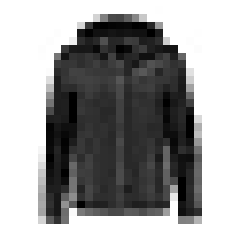

'Coat'

In [44]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()
class_names[y_train[0]]

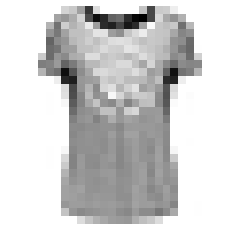

'T-shirt/top'

In [45]:
plt.imshow(X_train[1], cmap="binary")
plt.axis('off')
plt.show()
class_names[y_train[1]]

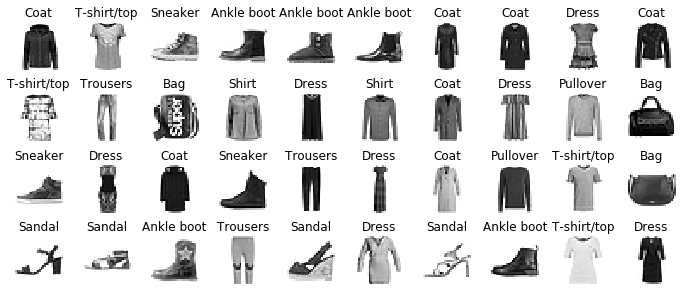

In [15]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [16]:
# create an empty sequential models list, which we will populate with 
# each of the layers we want to use.
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28])) # input layer
# hidden layer 1, with 300 neurons
model.add(keras.layers.Dense(300, activation='relu')) 
model.add(keras.layers.Dense(100, activation='relu')) # hidden layer 2
# output layer, we use the softmax function because the classes are exclusive
model.add(keras.layers.Dense(10, activation='softmax')) 

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
# first hidden layer has 784 x 300 weights, plus 300 bias terms = 235,500

In [19]:
model.layers[1].name

'dense'

In [20]:
model.get_layer('dense').name

'dense'

In [21]:
model.layers[2].name

'dense_1'

In [22]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [23]:
import datetime
dt_started = datetime.datetime.utcnow()

In [24]:
history = model.fit(X_train, y_train, 
                    epochs=30, validation_data=(X_validation, y_validation))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 90us/sample - loss: 0.7296 - accuracy: 0.7593 - val_loss: 0.5742 - val_accuracy: 0.7866
Epoch 2/30
55000/55000 [==============================] - 4s 78us/sample - loss: 0.4892 - accuracy: 0.8298 - val_loss: 0.4589 - val_accuracy: 0.8432
Epoch 3/30
55000/55000 [==============================] - 4s 77us/sample - loss: 0.4448 - accuracy: 0.8442 - val_loss: 0.4174 - val_accuracy: 0.8560
Epoch 4/30
55000/55000 [==============================] - 4s 75us/sample - loss: 0.4179 - accuracy: 0.8534 - val_loss: 0.4120 - val_accuracy: 0.8530
Epoch 5/30
55000/55000 [==============================] - 4s 75us/sample - loss: 0.3977 - accuracy: 0.8595 - val_loss: 0.3799 - val_accuracy: 0.8662
Epoch 6/30
55000/55000 [==============================] - 4s 76us/sample - loss: 0.3806 - accuracy: 0.8645 - val_loss: 0.3861 - val_accuracy: 0.8616
Epoch 7/30
55000/55000 [==============================] -

In [25]:
dt_ended = datetime.datetime.utcnow()
print("Time elapsed in seconds: ", (dt_ended - dt_started).total_seconds())

Time elapsed in seconds:  130.231293


In [26]:
import pandas as pd 

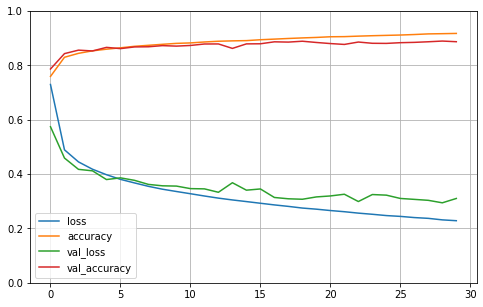

In [27]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to 0-1
plt.show()

In [50]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.729559,0.759309,0.574181,0.7866
1,0.489215,0.829800,0.458932,0.8432
2,0.444834,0.844200,0.417395,0.8560
3,0.417866,0.853400,0.411968,0.8530
4,0.397690,0.859473,0.379865,0.8662
5,0.380578,0.864545,0.386117,0.8616
6,0.367516,0.870055,0.377041,0.8678
7,0.354869,0.873782,0.362004,0.8684
8,0.344371,0.877455,0.356833,0.8726
9,0.335895,0.880891,0.355818,0.8708


In [28]:
X_new = X_test[:3]
y_probability = model.predict(X_new)
y_probability.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [29]:
y_predict = model.predict_classes(X_new)
y_predict

array([9, 2, 1], dtype=int64)

In [30]:
import numpy as np
np.array(class_names)[y_predict]

array(['Ankle boot', 'Pullover', 'Trousers'], dtype='<U11')

In [31]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

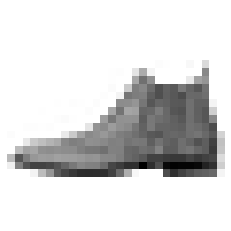

'Ankle boot'

In [36]:
plt.imshow(X_test[0], cmap="binary")
plt.axis('off')
plt.show()
class_names[y_test[0]]

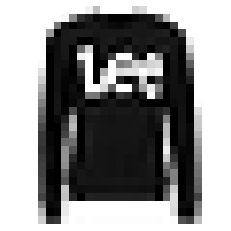

'Pullover'

In [37]:
plt.imshow(X_test[1], cmap="binary")
plt.axis('off')
plt.show()
class_names[y_test[1]]

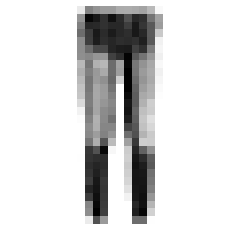

'Trousers'

In [38]:
plt.imshow(X_test[3], cmap="binary")
plt.axis('off')
plt.show()
class_names[y_test[3]]

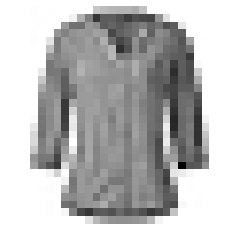

'Shirt'

In [39]:
plt.imshow(X_test[4], cmap="binary")
plt.axis('off')
plt.show()
class_names[y_test[4]]

Confusion matrix, without normalization
[[851   7   7  10  14   0  91   0  20   0]
 [  2 983   0   7   5   0   1   0   2   0]
 [ 15   8 511   1 331   0 119   0  14   1]
 [ 37  37   8 734 140   1  24   0  19   0]
 [  1   1  19   4 947   0  22   0   6   0]
 [  1   0   0   0   0 933   0   8   6  52]
 [153   2  16  12 187   0 599   0  31   0]
 [  0   0   0   0   0  16   0 736   2 246]
 [  4   1   1   0   6   1   0   2 983   2]
 [  0   0   0   0   0   2   1   2   0 995]]


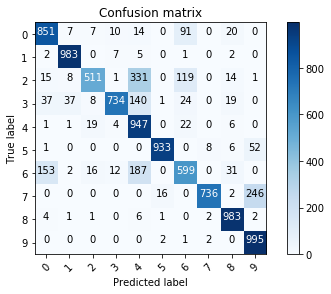

In [51]:
# Plot confusion matrix
# Code from Github repository from Udemy, Tensorflow 2.0: Deep Learning and Artificial Intelligence, 
# Lazy Programmer
# https://github.com/lazyprogrammer/machine_learning_examples

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [52]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

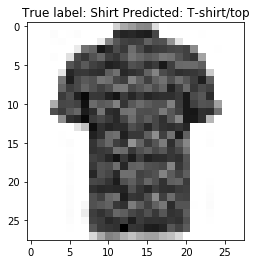

In [58]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28,28), cmap='binary')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

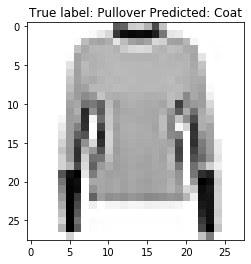

In [56]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28,28), cmap='binary')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

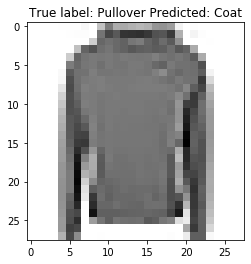

In [57]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28,28), cmap='binary')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

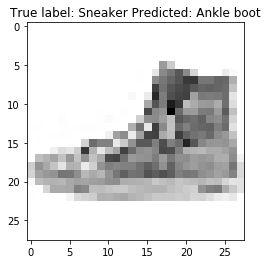

In [63]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28,28), cmap='binary')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));